In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import os
import ggplot


# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#splitting
from sklearn.cross_validation import train_test_split

#regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


#evaluation metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression


C:\Users\DELL\Miniconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\DELL\Miniconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\DELL\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note

In [2]:
#Set working directory
os.chdir("C:/Users/DELL/Desktop/edwisor/project2")

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/DELL/Desktop/edwisor/project2/day.csv",encoding='latin-1') 

In [4]:
#structure of data: Shows we have no null values at all
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


C:\Users\DELL\Miniconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


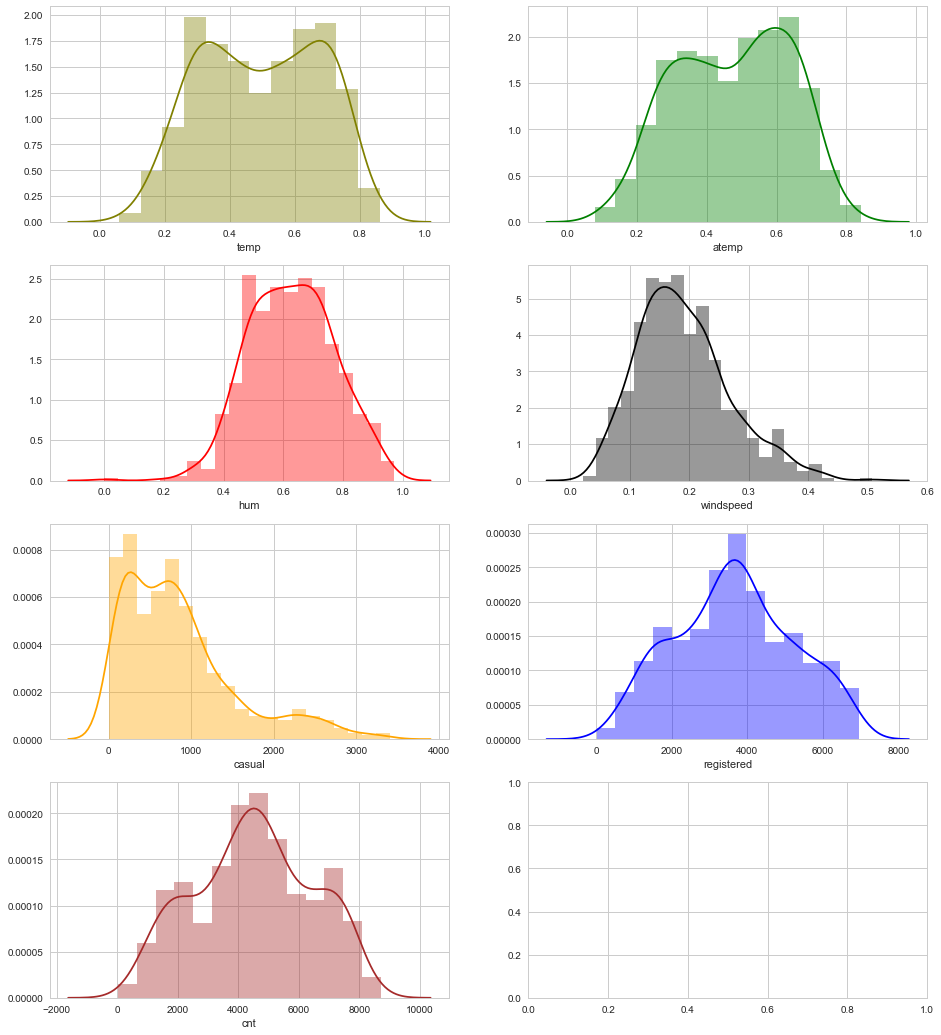

In [6]:
# KDE plot , probability distribution and histogram for continuous variables
f, axes = plt.subplots(4, 2, figsize=(14, 17))
sns.distplot( df["temp"] , color="olive", ax=axes[0, 0])
sns.distplot( df["atemp"] , color="green", ax=axes[0, 1])
sns.distplot( df["hum"] , color="red", ax=axes[1, 0])
sns.distplot( df["windspeed"] , color="black", ax=axes[1, 1])
sns.distplot( df["casual"] , color="orange", ax=axes[2, 0])
sns.distplot( df["registered"] , color="blue", ax=axes[2, 1])
sns.distplot( df["cnt"] , color="brown", ax=axes[3, 0])

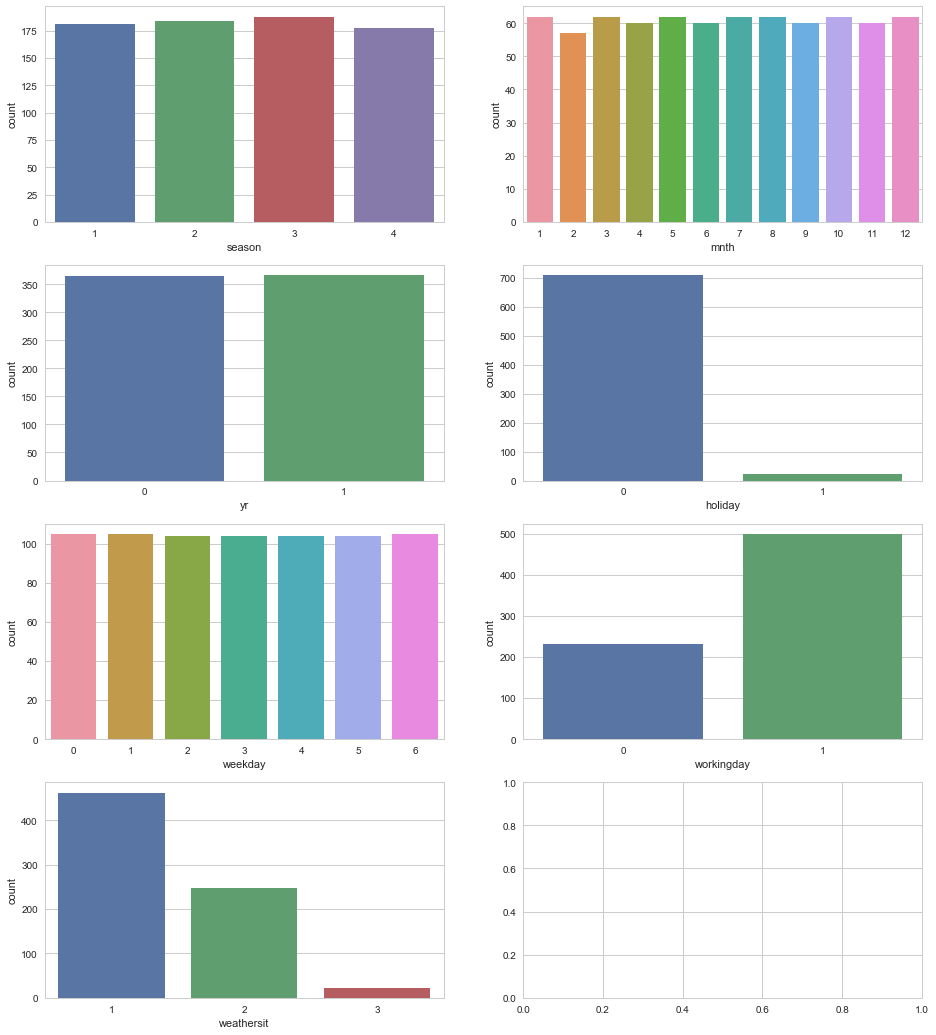

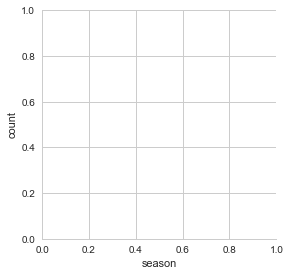

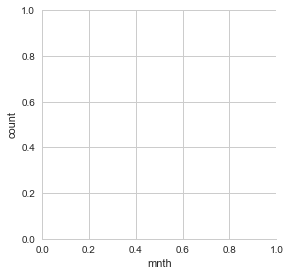

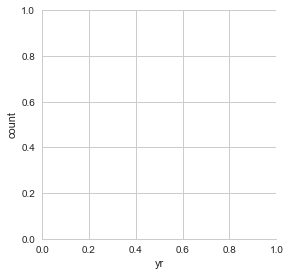

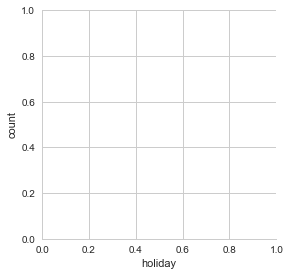

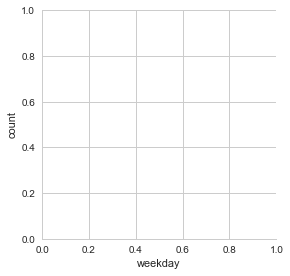

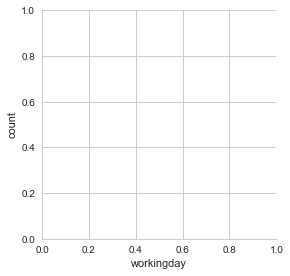

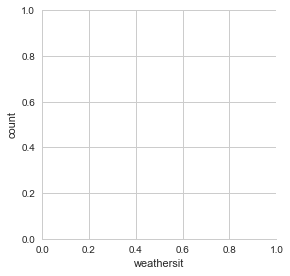

In [7]:
#count visualisation for categorical variables
f, axes = plt.subplots(4, 2, figsize=(14, 17))
sns.factorplot( x='season',data=df,kind='count', ax=axes[0, 0])
sns.factorplot( x='mnth',data=df,kind='count', ax=axes[0, 1])
sns.factorplot(x='yr',data=df,kind='count', ax=axes[1, 0])
sns.factorplot(x='holiday',data=df,kind='count', ax=axes[1, 1])
sns.factorplot(x='weekday',data=df,kind='count', ax=axes[2, 0])
sns.factorplot(x='workingday',data=df,kind='count', ax=axes[2, 1])
sns.factorplot(x='weathersit',data=df,kind='count',ax=axes[3,0])

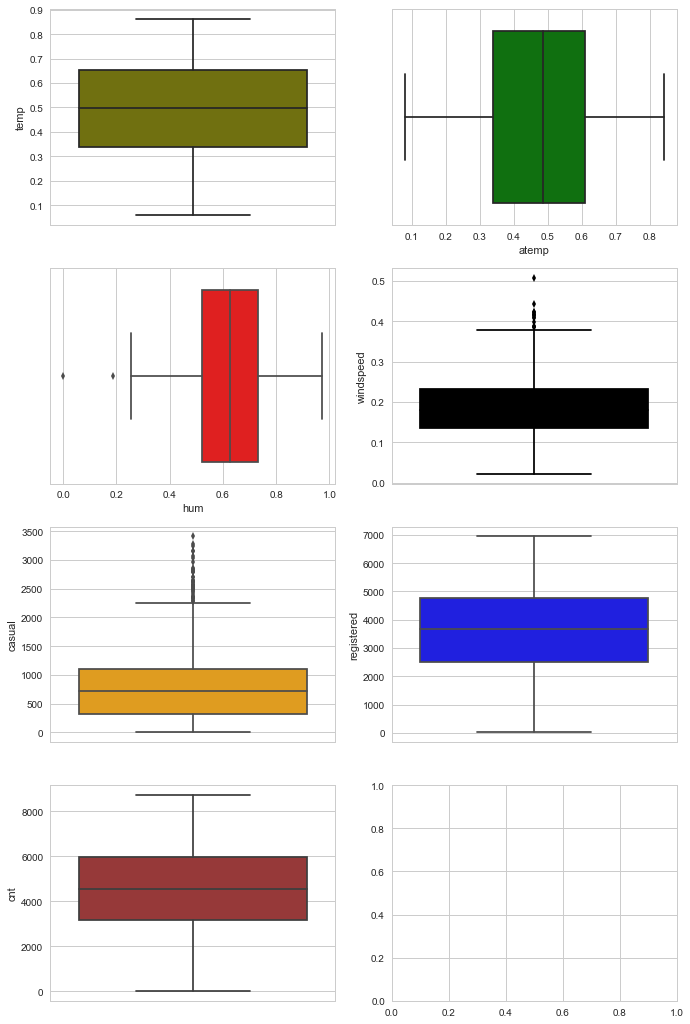

In [8]:
#boxplots of all continuous variables
f, axes = plt.subplots(4, 2, figsize=(10, 17))
sns.boxplot( y=df["temp"] , color="olive", ax=axes[0, 0])
sns.boxplot( df["atemp"] , color="green", ax=axes[0, 1])
sns.boxplot( df["hum"] , color="red", ax=axes[1, 0])
sns.boxplot( y=df["windspeed"] , color="black", ax=axes[1, 1])
sns.boxplot( y=df["casual"] , color="orange", ax=axes[2, 0])
sns.boxplot( y=df["registered"] , color="blue", ax=axes[2, 1])
sns.boxplot( y=df["cnt"] , color="brown", ax=axes[3, 0])

In [9]:
#Extract quartiles for continuous variables with outliers
Windspeedq75, Windspeedq25 = np.percentile(df['windspeed'], [75 ,25])
humq75, humq25 = np.percentile(df['hum'], [75 ,25])

In [10]:
#Interquartile Region
Windspeediqr = Windspeedq75 - Windspeedq25
humiqr = humq75 - humq25

In [11]:
#Whiskers  value
Windspeedminimum = Windspeedq25 - (Windspeediqr*1.5)
Windspeedmaximum = Windspeedq75 + (Windspeediqr*1.5)
humminimum = humq25 - (humiqr*1.5)
hummaximum = humq75 + (humiqr*1.5)

In [12]:
Windspeedminimum

-0.012446750000000034

In [13]:
Windspeedmaximum

0.38061125

In [14]:
humminimum

0.20468725

In [15]:
hummaximum

1.0455212500000002

In [16]:
#Replacing windspeed outliers below IQR with minimum values
for i in range(len(df)):
    if(df['windspeed'].iloc[i] < 0.0124):
        df['windspeed'].iloc[i]=0.0124

In [17]:
#Replacing windspeed outliers above IQR with maximum values
for i in range(len(df)):
    if(df['windspeed'].iloc[i] > Windspeedmaximum):
        df['windspeed'].iloc[i]=Windspeedmaximum

C:\Users\DELL\Miniconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
#Replacing humidity outliers above IQR with maximum values
for i in range(len(df)):
    if(df['hum'].iloc[i] > hummaximum):
        df['hum'].iloc[i]=hummaximum

In [19]:
#Replacing humidity outliers below IQR with minimum values
for i in range(len(df)):
    if(df['hum'].iloc[i] < humminimum):
        df['hum'].iloc[i]=humminimum

C:\Users\DELL\Miniconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


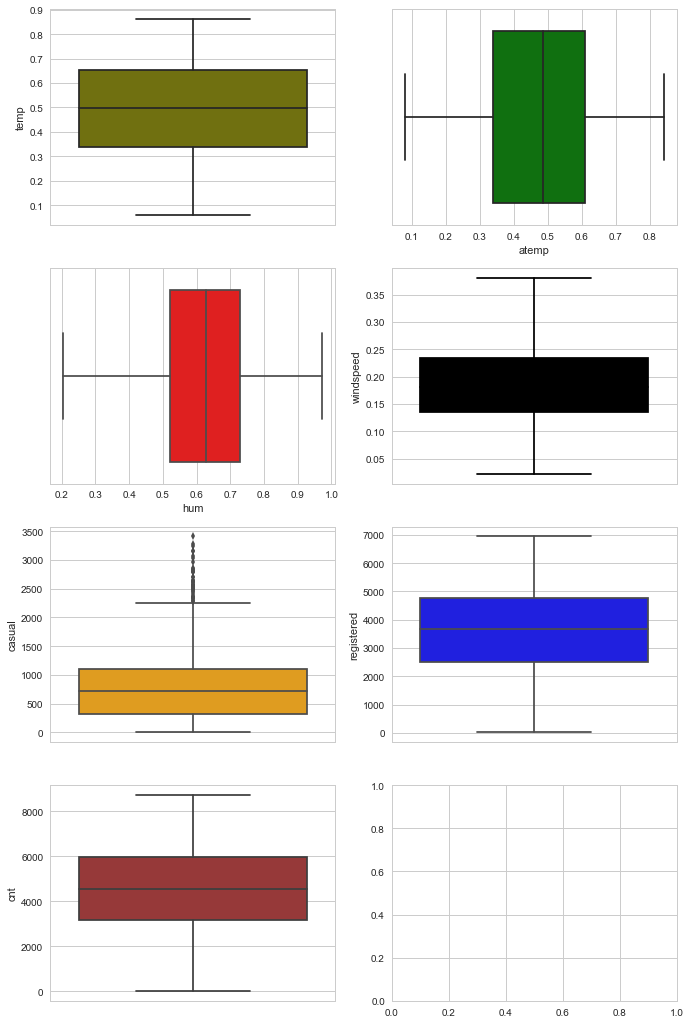

In [20]:
#Again checking if outliers remaining
f, axes = plt.subplots(4, 2, figsize=(10, 17))
sns.boxplot( y=df["temp"] , color="olive", ax=axes[0, 0])
sns.boxplot( df["atemp"] , color="green", ax=axes[0, 1])
sns.boxplot( df["hum"] , color="red", ax=axes[1, 0])
sns.boxplot( y=df["windspeed"] , color="black", ax=axes[1, 1])
sns.boxplot( y=df["casual"] , color="orange", ax=axes[2, 0])
sns.boxplot( y=df["registered"] , color="blue", ax=axes[2, 1])
sns.boxplot( y=df["cnt"] , color="brown", ax=axes[3, 0])

In [21]:
#Correlation Analysis for continuous variables
cnames =  ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

In [22]:
#Correlation plot
df_corr = df.loc[:,cnames]

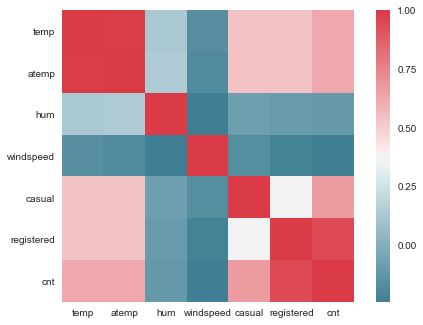

In [23]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
#drop temp,casual,registered
df.drop(['temp','casual','registered'], axis = 1, inplace = True)

In [25]:
#create dummy variables with all weathersit values
weathersit = pd.get_dummies(df['weathersit'],prefix='weathersit')
df=pd.concat([df,weathersit],axis=1)

In [26]:
#create dummy variables with all season values
season = pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)

In [27]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985,0,1,0,1,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801,0,1,0,1,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349,1,0,0,1,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562,1,0,0,1,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600,1,0,0,1,0,0,0


In [28]:
#drop not required variables
df.drop(['season','dteday','weathersit','instant'],axis=1,inplace=True)

In [29]:
df.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,0,1,0,6,0,0.363625,0.805833,0.160446,985,0,1,0,1,0,0,0
1,0,1,0,0,0,0.353739,0.696087,0.248539,801,0,1,0,1,0,0,0
2,0,1,0,1,1,0.189405,0.437273,0.248309,1349,1,0,0,1,0,0,0
3,0,1,0,2,1,0.212122,0.590435,0.160296,1562,1,0,0,1,0,0,0
4,0,1,0,3,1,0.229270,0.436957,0.186900,1600,1,0,0,1,0,0,0


C:\Users\DELL\Miniconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


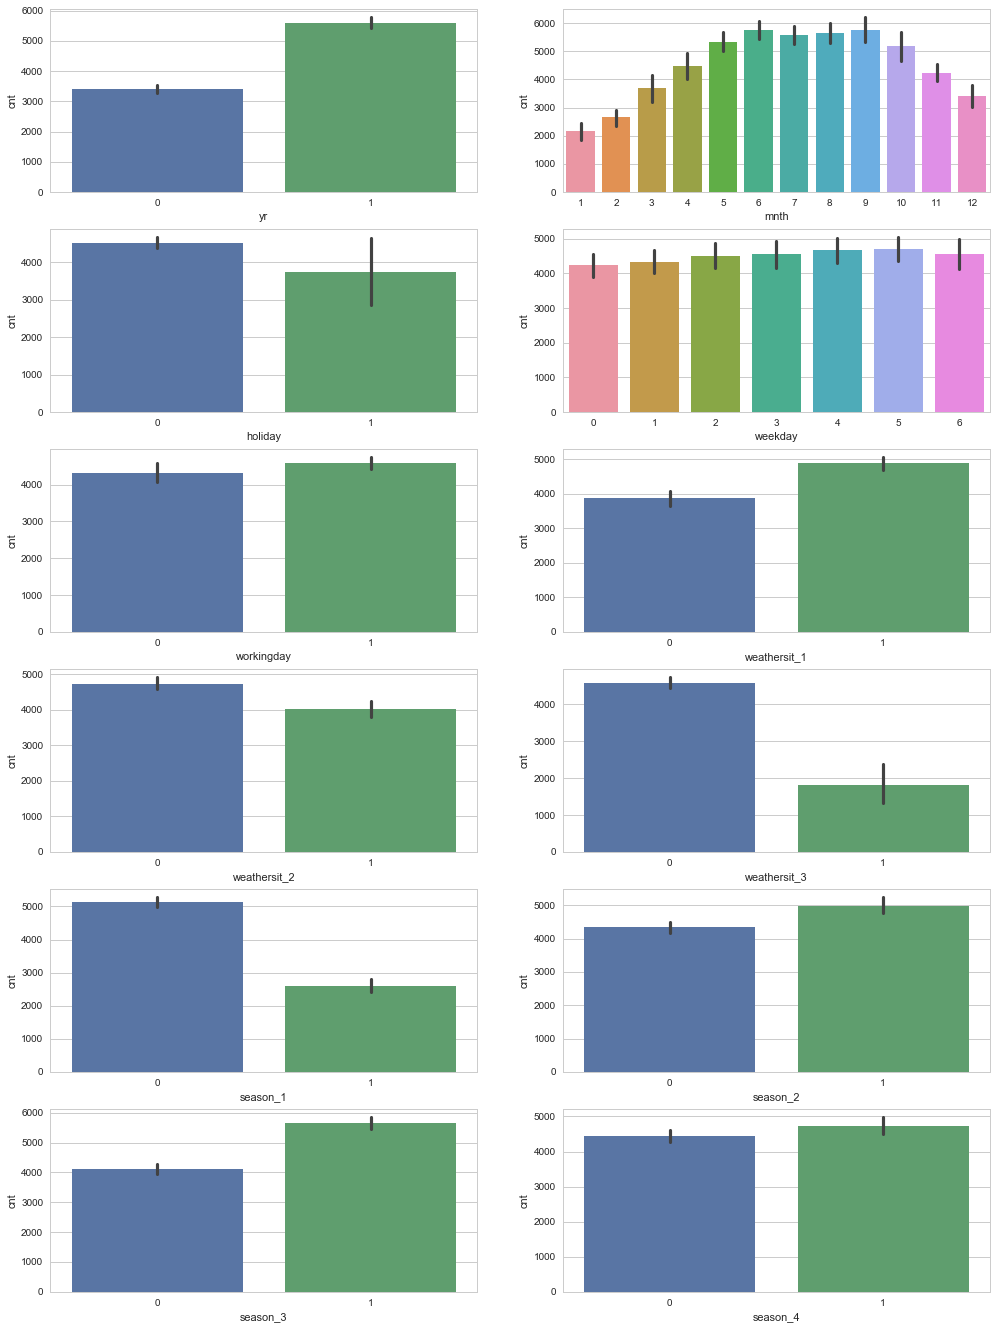

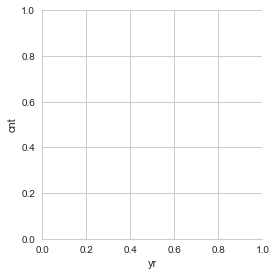

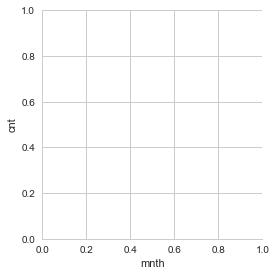

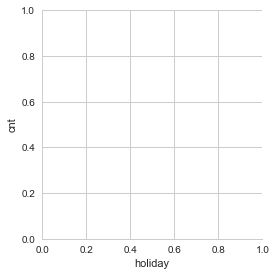

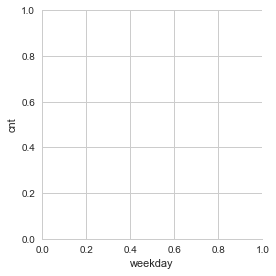

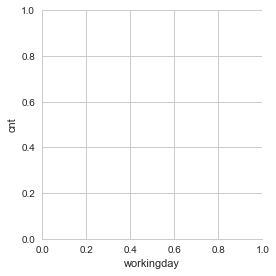

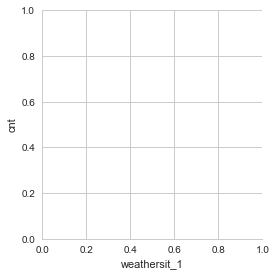

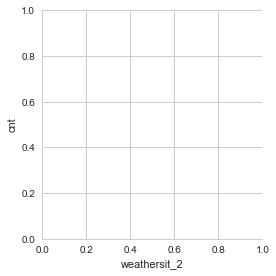

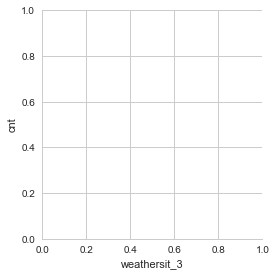

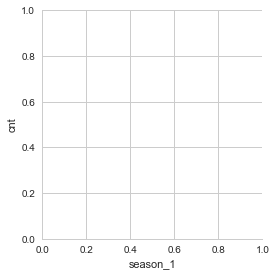

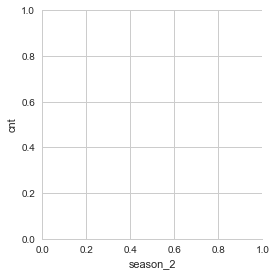

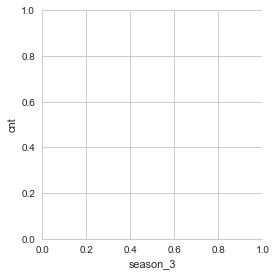

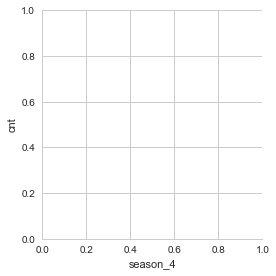

In [30]:
#checking count plot for all categorical variables
f, axes = plt.subplots(6, 2, figsize=(15, 22))
sns.factorplot(x="yr",y="cnt",data=df,kind='bar', ax=axes[0, 0])
sns.factorplot(x="mnth",y="cnt",data=df,kind='bar' , ax=axes[0, 1])
sns.factorplot(x="holiday",y="cnt",data=df,kind='bar', ax=axes[1, 0])
sns.factorplot(x="weekday",y="cnt",data=df,kind='bar', ax=axes[1, 1])
sns.factorplot(x="workingday",y="cnt",data=df,kind='bar', ax=axes[2, 0])
sns.factorplot(x="weathersit_1",y="cnt",data=df,kind='bar', ax=axes[2, 1])
sns.factorplot(x="weathersit_2",y="cnt",data=df,kind='bar', ax=axes[3, 0])
sns.factorplot(x="weathersit_3",y="cnt",data=df,kind='bar', ax=axes[3, 1])
sns.factorplot(x="season_1",y="cnt",data=df,kind='bar', ax=axes[4, 0])
sns.factorplot(x="season_2",y="cnt",data=df,kind='bar', ax=axes[4, 1])
sns.factorplot(x="season_3",y="cnt",data=df,kind='bar', ax=axes[5, 0])
sns.factorplot(x="season_4",y="cnt",data=df,kind='bar', ax=axes[5, 1])

In [31]:
df.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,0,1,0,6,0,0.363625,0.805833,0.160446,985,0,1,0,1,0,0,0
1,0,1,0,0,0,0.353739,0.696087,0.248539,801,0,1,0,1,0,0,0
2,0,1,0,1,1,0.189405,0.437273,0.248309,1349,1,0,0,1,0,0,0
3,0,1,0,2,1,0.212122,0.590435,0.160296,1562,1,0,0,1,0,0,0
4,0,1,0,3,1,0.229270,0.436957,0.186900,1600,1,0,0,1,0,0,0


In [32]:
#Divide data into train and test with 80% train data
X = df.values[:, df.columns!=8]
Y = df.values[:,8]


X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [33]:
#Random Forest

RF_model = RandomForestRegressor(n_estimators = 20).fit(X_train, y_train)
RF_Predictions = RF_model.predict(X_test)
np.sqrt(metrics.mean_squared_log_error(y_test,RF_Predictions))

0.03275232622031458

In [34]:
metrics.r2_score(y_test,RF_Predictions)

0.9998723006411618

In [35]:
#XGBoost

model = XGBRegressor(n_estimators = 100).fit(X_train, y_train)
Predictions = model.predict(X_test)
np.sqrt(metrics.mean_squared_log_error(y_test,Predictions))

0.036718632597928354

In [36]:
metrics.r2_score(y_test,Predictions)

0.9997028067993299

In [37]:
#KNeighborRegressor
model = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)
Predictions = model.predict(X_test)
np.sqrt(metrics.mean_squared_log_error(y_test,Predictions))

0.043110877138417616

In [38]:
metrics.r2_score(y_test,Predictions)

0.9997314868485148

In [39]:
#Linear Regression
linreg=LinearRegression()
linreg.fit(X_train, y_train)
Linear_Predictions=linreg.predict(X_test)
np.sqrt(metrics.mean_squared_log_error(y_test,Linear_Predictions))

2.175583928816829e-15

In [40]:
metrics.r2_score(y_test,Linear_Predictions)

1.0